In [1]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data set
badDrivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ZybookDataScience/Data/bad-drivers.csv')

In [5]:
# Create bootstrap samples and collect errors

bootstrapErrors = []
for i in range(0, 30):
    # Create the bootstrap sample and the out-of-bag sample
    boot = resample(badDrivers, replace=True, n_samples=51)
    oob = badDrivers[~badDrivers.index.isin(boot.index)]

    # Fit a linear model to the bootstrap sample
    XBoot = boot[
        ['Losses incurred by insurance companies for collisions per insured driver ($)']
    ].values.reshape(-1, 1)
    yBoot = boot[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
    linModel = LinearRegression()
    linModel.fit(XBoot, yBoot)

    # Predict y values for the out-of-bag sample
    XOob = oob[
        ['Losses incurred by insurance companies for collisions per insured driver ($)']
    ].values.reshape(-1, 1)
    YOob = oob[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
    YOobPredicted = linModel.predict(XOob)

    # Calculate the error
    bootError = mean_squared_error(YOob, YOobPredicted)
    bootstrapErrors.append(bootError)

In [6]:
# Calculate the mean of the errors
np.mean(bootstrapErrors)

20239.25411679844

In [7]:
# Calculate the standard deviation of the errors
np.std(bootstrapErrors)

4577.871173428799

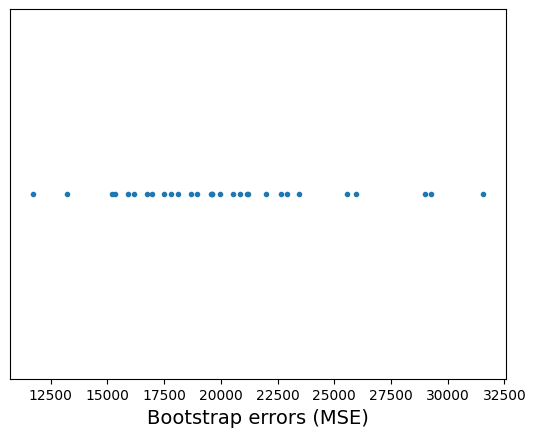

In [8]:
# Plot the errors
plt.plot(bootstrapErrors, np.zeros_like(bootstrapErrors), '.')
plt.xlabel('Bootstrap errors (MSE)', fontsize=14)
plt.gca().axes.yaxis.set_ticks([]);